In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wordcloud

## Textual data: classification and exploration.

In [3]:
import pandas as pd

review = pd.read_csv('/content/drive/My Drive/dataset/imdb-reviews-pt-br.csv')
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
print("Negative \n")
print(review.text_pt[189])

print("\nPositive \n")
print(review.text_pt[49002])

Negative 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.

Positive 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos 

In [5]:
print(review["sentiment"].value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [6]:
classification = review["sentiment"].replace(["neg", "pos"], [0,1])
review["classification"] = classification

In [7]:
review.head()

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Bag of Words: creating representations of human language.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(text)

In [9]:
vectorizer.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [10]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [11]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                    columns=vectorizer.get_feature_names_out())
sparse_matrix

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [12]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(review["text_pt"])
print(bag_of_words.shape)

(49459, 50)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def classify_text(text, text_column, classification_column):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(text[text_column])

    X_train, X_test, y_train, y_test = train_test_split(bag_of_words,
                                                    text[classification_column],
                                                    random_state = 42)
  
    logistic_regression = LogisticRegression(solver="lbfgs")
    logistic_regression.fit(X_train, y_train)
    return logistic_regression.score(X_test, y_test)

In [14]:
print(classify_text(review, "text_pt", "classification"))

0.6583097452486858


## Data visualization with WordCloud.

In [15]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in review["text_pt"]])

word_cloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

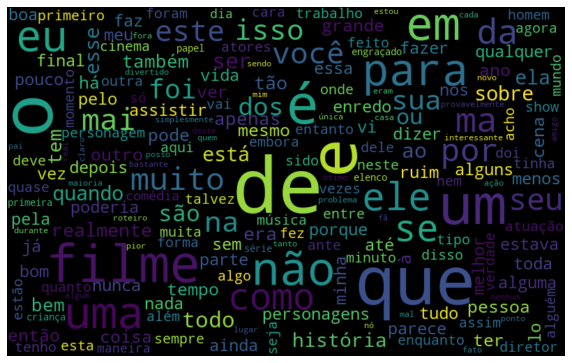

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
def neg_word_cloud(text, text_column):
    negative_text = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in negative_text[text_column]])

    word_cloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [18]:
def pos_word_cloud(text, text_column):
    positive_text = text.query("sentiment == 'pos'")
    all_words = ' '.join([text for text in positive_text[text_column]])

    word_cloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

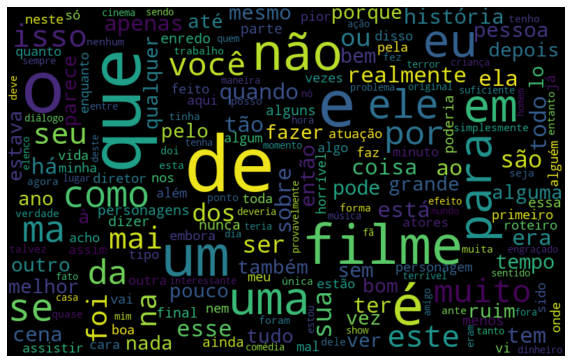

In [19]:
neg_word_cloud(review, "text_pt")

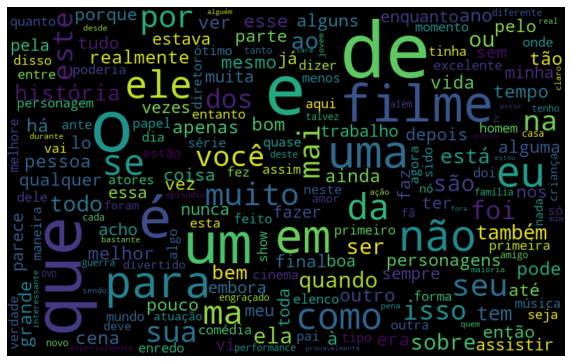

In [20]:
pos_word_cloud(review, "text_pt")

## Tokenization and NLTK library

In [21]:
import nltk

phrase = ["um filme bom", "um filme ruim"]
frequency = nltk.FreqDist(phrase)
frequency

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [22]:
from nltk import tokenize

phrase = "Bem vindo ao mundo do PLN!"

space_token = tokenize.WhitespaceTokenizer()
phrase_token = space_token.tokenize(phrase)
print(phrase_token)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [23]:
phrase_token = space_token.tokenize(all_words)
frequency = nltk.FreqDist(phrase_token)

In [24]:
df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
df_frequency.nlargest(columns = "Frequency", n = 10)

,Word,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


## A new visualization and the stop words.

In [28]:
import seaborn as sns

In [29]:
def pareto(text, text_column, quantity):
  all_words = ' '.join([text for text in text[text_column]])
  phrase_token = space_token.tokenize(all_words)
  frequency = nltk.FreqDist(phrase_token)
  df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                               "Frequency": list(frequency.values())})
  df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", 
                   color = "gray")
  ax.set(ylabel = "Count")
  plt.show()

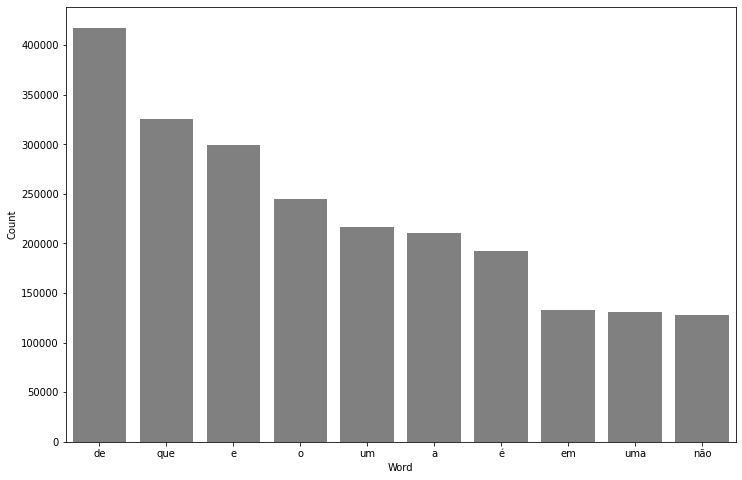

In [30]:
pareto(review, "text_pt", 10)

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
irrelevant_words = nltk.corpus.stopwords.words("portuguese") 
processed_phrase = list()

for opinion in review['text_pt']:
    new_phrase = list()
    text_words = space_token.tokenize(opinion)
    for word in text_words:
        if word not in irrelevant_words:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))

In [33]:
review["treatment_1"] = processed_phrase

In [34]:
review.head()

,id,text_en,text_pt,sentiment,classification,treatment_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [35]:
classify_text(review, "treatment_1", "classification")

0.6811160533764659

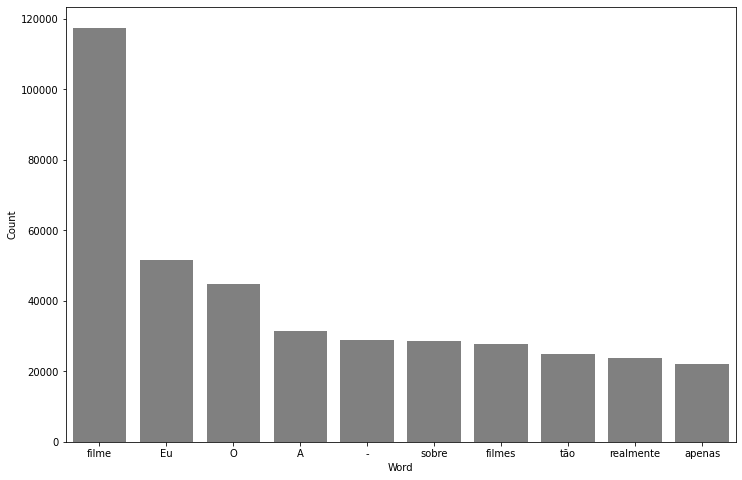

In [36]:
pareto(review, "treatment_1", 10)

## Optimizing analysis: the first step.

In [37]:
from nltk import tokenize

phrase = "Hello world!"
token_punct = tokenize.WordPunctTokenizer()
token_phrase = token_punct.tokenize(phrase)

print(token_phrase)

['Hello', 'world', '!']


## Improving pareto visualization

In [38]:
from string import punctuation

punct = list()
for p in punctuation:
    punct.append(p)

punctuation_stopwords = punct + irrelevant_words

processed_phrase = list()
for opinion in review["treatment_1"]:
    new_phrase = list()
    text_words = token_punct.tokenize(opinion)
    for word in text_words:
        if word not in punctuation_stopwords:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))

review["treatment_2"] = processed_phrase

In [39]:
review.head()

,id,text_en,text_pt,sentiment,classification,treatment_1,treatment_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [40]:
review["treatment_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [41]:
review["treatment_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

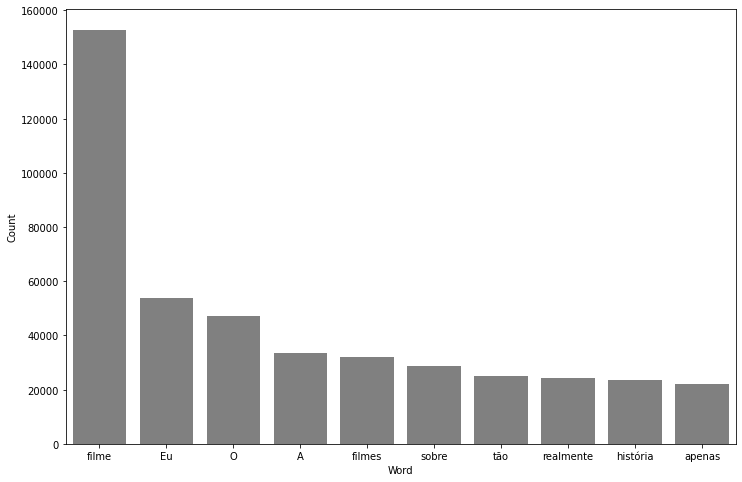

In [42]:
pareto(review, "treatment_2", 10)